In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Total_final_dataset.csv", dtype=str)

In [ ]:
df.shape

(67645, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67645 entries, 0 to 67644
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   67645 non-null  object
 1   target  67645 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [ ]:
df_input = df['input'].apply(lambda x : len(x.split()))

df_input.describe()

count    67645.000000
mean        22.994294
std         15.218741
min          1.000000
25%         13.000000
50%         20.000000
75%         29.000000
max        963.000000
Name: input, dtype: float64

In [ ]:
df_target = df['target'].apply(lambda x : len(x.split()))

df_target.describe()

count    67645.000000
mean        22.731037
std         14.099585
min          1.000000
25%         13.000000
50%         20.000000
75%         29.000000
max        149.000000
Name: target, dtype: float64

In [ ]:
#  This is the number of characters present in the input sentence
data_input_character_length = df.input.apply(lambda x:len(str(x)))
# This is the number of words present in the input sentence
data_input_word_length = df.input.apply(lambda x: len(str(x).split()))

In [ ]:

#  Maximum charcter length of input sentence
print("Maximum Input Length = ", data_input_character_length.max())

# 99th percentile of length of input characters fall under
print("97th percentile of the characters = ", np.percentile(data_input_character_length, 97))

# Maximum Word length in the input sentence
print("Maximim Input Words = ", data_input_word_length.max())

# 99th percentile of the length of input words fall under
print("97th percentile of the Length of input word = ", np.percentile(data_input_word_length, 97))

Maximum Input Length =  6147
97th percentile of the characters =  330.0
Maximim Input Words =  963
97th percentile of the Length of input word =  55.0


In [ ]:
# This is the number of characters present in the target sentence
data_target_character_length = df.target.apply(lambda x : len(x))
# This ist the number of words present in the target sentence
data_target_word_length = df.target.apply(lambda x : len(x.split()))

In [ ]:

#  Maximum charcter length of input sentence
print("Maximum Target Length = ", data_target_character_length.max())

# 99th percentile of length of input characters fall under
print("97th percentile of the characters = ", np.percentile(data_target_character_length, 97))

# Maximum Word length in the input sentence
print("Maximim Target Words = ", data_target_word_length.max())

# 99th percentile of the length of input words fall under
print("97th percentile of the Length of Target word = ", np.percentile(data_target_word_length, 97))

Maximum Target Length =  984
97th percentile of the characters =  331.0
Maximim Target Words =  149
97th percentile of the Length of Target word =  55.0


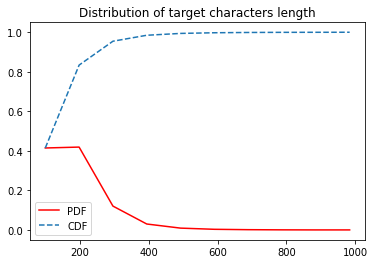

In [ ]:
data = data_target_character_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of target characters length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

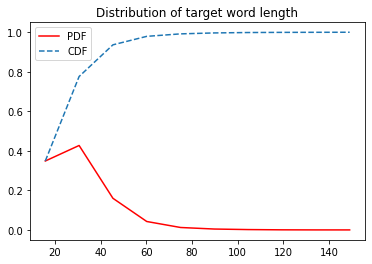

In [ ]:
data = data_target_word_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of target word length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

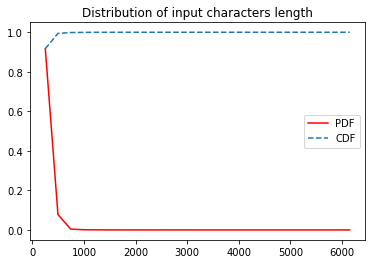

In [ ]:
data = data_input_character_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=25)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF

plt.title('Distribution of input characters length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF",linestyle="dashed")
plt.legend()

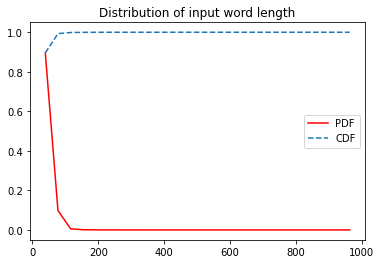

In [ ]:
data = data_input_word_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=25)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of input word length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

In [ ]:
text_input = ""
text_target = ""

for i in df["input"].values:
  if(i not in ["S", "s"]):
    text_input += " " + str(i)

for i in df["target"].values:
  if (i not in ["S", "s"]):
    text_target += " " + str(i)

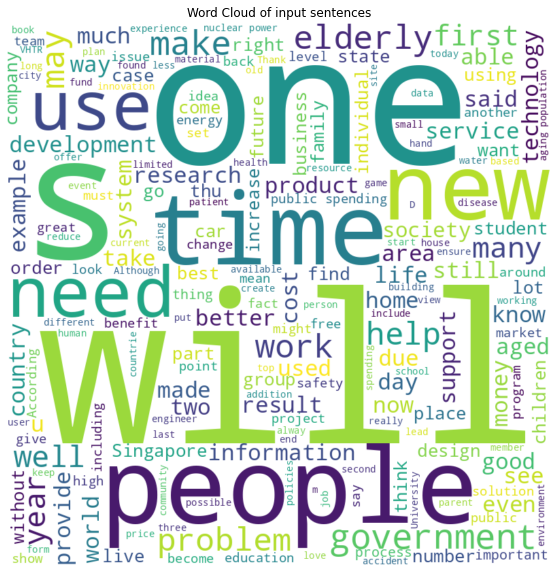

In [ ]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# wordcloud_input = WordCloud(width = 800, height = 800,
#                             background_color='black',
#                             min_font_size= 10, color_func=grey_color_func).generate(input_text)
wordcloud_input = WordCloud(width = 800, height = 800,
                            background_color='white',
                            min_font_size= 10).generate(text_input)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud_input, interpolation="bilinear")
plt.title("Word Cloud of input sentences")
plt.axis("off")
plt.show()

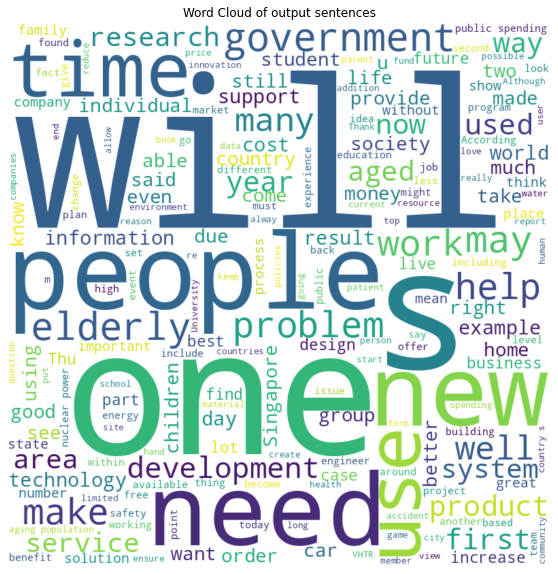

In [ ]:
wordcloud_input = WordCloud(width = 800, height = 800,
                            background_color='white',
                            min_font_size= 10).generate(text_target)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud_input, interpolation="bilinear")
plt.title("Word Cloud of output sentences")
plt.axis("off")
plt.show()

Text(0, 0.5, 'Count or Density')

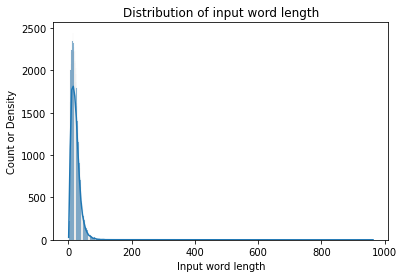

In [ ]:
import seaborn as sns
import pandas as pd

# Create a Pandas Series with input word length data
data_input_word_length = pd.Series(data_input_word_length)

# Create a histogram with a density curve
sns.histplot(data=data_input_word_length, kde=True)

# Set the title and labels for the plot
plt.title('Distribution of input word length')
plt.xlabel('Input word length')
plt.ylabel('Count or Density')

In [ ]:
data_input_word_length

0     4
1     6
2     7
3     3
4     5
5     6
6     8
7     9
8     2
9     3
10    5
11    6
12    8
13    7
14    5
dtype: int64